In [14]:
from fbprophet import Prophet
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from tqdm.auto import tqdm

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [4]:
train_data = train[['cfips', 'first_day_of_month', 'microbusiness_density']]

In [5]:
train_data = train_data.astype({'cfips':'category', 'first_day_of_month':'datetime64[ns]'})

In [6]:
train_data.dtypes

cfips                          category
first_day_of_month       datetime64[ns]
microbusiness_density           float64
dtype: object

In [7]:
train_data.sort_values(by=['cfips', 'first_day_of_month'])

,cfips,first_day_of_month,microbusiness_density
0,1001,2019-08-01,3.007682
1,1001,2019-09-01,2.884870
2,1001,2019-10-01,3.055843
3,1001,2019-11-01,2.993233
4,1001,2019-12-01,2.993233
...,...,...,...
122260,56045,2022-06-01,1.803249
122261,56045,2022-07-01,1.803249
122262,56045,2022-08-01,1.785395
122263,56045,2022-09-01,1.785395


In [8]:
cfips = train_data['cfips'].unique()

## Testing for a few counties

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.



Initial log joint probability = -47.2868
Iteration  1. Log joint probability =     51.367. Improved by 98.6538.
Iteration  2. Log joint probability =     60.204. Improved by 8.83707.
Iteration  3. Log joint probability =    77.2908. Improved by 17.0868.
Iteration  4. Log joint probability =    77.5654. Improved by 0.274537.
Iteration  5. Log joint probability =    77.6117. Improved by 0.0463252.
Iteration  6. Log joint probability =    77.6659. Improved by 0.0541629.
Iteration  7. Log joint probability =    77.8333. Improved by 0.167405.
Iteration  8. Log joint probability =    92.7872. Improved by 14.9539.
Iteration  9. Log joint probability =    92.7946. Improved by 0.00741293.
Iteration 10. Log joint probability =    92.8146. Improved by 0.0200293.
Iteration 11. Log joint probability =    92.8191. Improved by 0.00450959.
Iteration 12. Log joint probability =    92.8214. Improved by 0.0022548.
Iteration 13. Log joint probability =    92.8225. Improved by 0.0011274.
Iteration 14. Log

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.



Initial log joint probability = -47.2862
Iteration  1. Log joint probability =    46.5215. Improved by 93.8077.
Iteration  2. Log joint probability =    73.4594. Improved by 26.9379.
Iteration  3. Log joint probability =    89.8757. Improved by 16.4163.
Iteration  4. Log joint probability =    90.9196. Improved by 1.04387.
Iteration  5. Log joint probability =    102.489. Improved by 11.5694.
Iteration  6. Log joint probability =    102.492. Improved by 0.00346383.
Iteration  7. Log joint probability =    105.639. Improved by 3.14614.
Iteration  8. Log joint probability =    105.641. Improved by 0.00206534.
Iteration  9. Log joint probability =    105.643. Improved by 0.00201529.
Iteration 10. Log joint probability =    105.644. Improved by 0.00100765.
Iteration 11. Log joint probability =    105.654. Improved by 0.0107862.
Iteration 12. Log joint probability =     105.67. Improved by 0.0157438.
Iteration 13. Log joint probability =    105.678. Improved by 0.0078719.
Iteration 14. Log

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.



Initial log joint probability = -47.2644
Iteration  1. Log joint probability =    61.9519. Improved by 109.216.
Iteration  2. Log joint probability =    77.7453. Improved by 15.7934.
Iteration  3. Log joint probability =    94.5895. Improved by 16.8442.
Iteration  4. Log joint probability =    100.796. Improved by 6.20626.
Iteration  5. Log joint probability =    100.848. Improved by 0.0524504.
Iteration  6. Log joint probability =    100.875. Improved by 0.0264551.
Iteration  7. Log joint probability =    100.902. Improved by 0.027858.
Iteration  8. Log joint probability =    101.062. Improved by 0.159842.
Iteration  9. Log joint probability =    101.107. Improved by 0.0442879.
Iteration 10. Log joint probability =    101.242. Improved by 0.135858.
Iteration 11. Log joint probability =    107.336. Improved by 6.0931.
Iteration 12. Log joint probability =    107.372. Improved by 0.036135.
Iteration 13. Log joint probability =    107.392. Improved by 0.0206045.
Iteration 14. Log joint 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.



Initial log joint probability = -47.2631
Iteration  1. Log joint probability =    61.9753. Improved by 109.238.
Iteration  2. Log joint probability =    74.6594. Improved by 12.6841.
Iteration  3. Log joint probability =    95.4341. Improved by 20.7748.
Iteration  4. Log joint probability =    100.491. Improved by 5.05668.
Iteration  5. Log joint probability =    114.399. Improved by 13.9086.
Iteration  6. Log joint probability =    120.063. Improved by 5.66339.
Iteration  7. Log joint probability =     120.24. Improved by 0.176823.
Iteration  8. Log joint probability =     120.38. Improved by 0.140563.
Iteration  9. Log joint probability =    120.744. Improved by 0.364007.
Iteration 10. Log joint probability =    120.836. Improved by 0.0922207.
Iteration 11. Log joint probability =    120.977. Improved by 0.141053.
Iteration 12. Log joint probability =    120.998. Improved by 0.020605.
Iteration 13. Log joint probability =    121.051. Improved by 0.0533097.
Iteration 14. Log joint pr

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.



Initial log joint probability = -47.8864
Iteration  1. Log joint probability =    25.1321. Improved by 73.0185.
Iteration  2. Log joint probability =    38.3076. Improved by 13.1755.
Iteration  3. Log joint probability =     52.799. Improved by 14.4914.
Iteration  4. Log joint probability =    53.6774. Improved by 0.878427.
Iteration  5. Log joint probability =     56.251. Improved by 2.57352.
Iteration  6. Log joint probability =    56.2546. Improved by 0.00365977.
Iteration  7. Log joint probability =    56.2707. Improved by 0.0160799.
Iteration  8. Log joint probability =    56.2845. Improved by 0.0137548.
Iteration  9. Log joint probability =    56.3834. Improved by 0.0989053.
Iteration 10. Log joint probability =    56.5613. Improved by 0.177937.
Iteration 11. Log joint probability =    56.6846. Improved by 0.123287.
Iteration 12. Log joint probability =    56.7058. Improved by 0.0212473.
Iteration 13. Log joint probability =    56.7258. Improved by 0.0200145.
Iteration 14. Log j

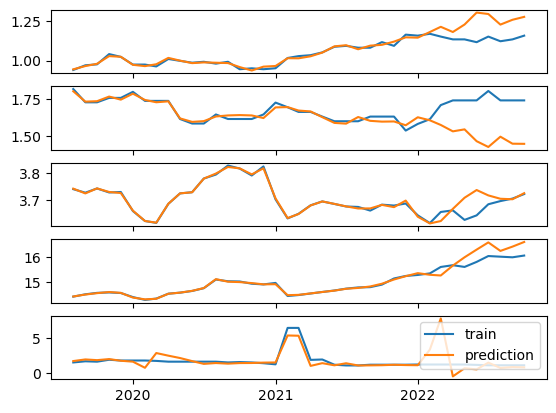

In [12]:
n = 5
fig, axs = plt.subplots(n, sharex='col')
for i in range(n):
    county = random.choice(cfips)
    prophet_data = train_data.loc[train_data['cfips']==county, ['first_day_of_month', 'microbusiness_density']]
    prophet_data.rename(
        columns={'first_day_of_month': 'ds', 'microbusiness_density': 'y'}, inplace=True)
    ax = axs[i]
    l1 = ax.plot(prophet_data['ds'].values, prophet_data['y'].values, label = 'train')
    prophet_data = prophet_data.iloc[:31]
    model = Prophet()
    model.fit(prophet_data)
    future = model.make_future_dataframe(periods=8, freq = 'MS')
    forecast = model.predict(future)
    l2 = ax.plot(forecast['ds'].values, forecast['yhat'].values, label = 'prediction')

    locator = mdates.AutoDateLocator(minticks=3, maxticks=5)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

lines_labels = [fig.axes[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

plt.legend(lines, labels)
plt.show()

In [15]:
forecast_dict = {}

def store(county, x, forecast_dict):
    forecast_dict[str(county)+'_'+str(x['date'])] = x['yhat']

for county in tqdm(cfips):

    prophet_data = train_data.loc[train_data['cfips'] == county, [
        'first_day_of_month', 'microbusiness_density']]
    prophet_data.rename(columns={'first_day_of_month': 'ds', 'microbusiness_density': 'y'}, inplace=True)
    model = Prophet()
    model.fit(prophet_data)
    future = model.make_future_dataframe(periods=8, freq='MS')
    forecast = model.predict(future)
    forecast = forecast[39:][['ds', 'yhat']]
    forecast['date'] = forecast['ds'].dt.date
    forecast.apply(lambda x: store(county=county, x=x,
               forecast_dict=forecast_dict), axis=1)


  0%|          | 0/3135 [00:00<?, ?it/s]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0178
Iteration  1. Log joint probability =    57.3735. Improved by 107.391.
Iteration  2. Log joint probability =    104.387. Improved by 47.0139.
Iteration  3. Log joint probability =    128.464. Improved by 24.0762.
Iteration  4. Log joint probability =    141.607. Improved by 13.1436.
Iteration  5. Log joint probability =    147.831. Improved by 6.22408.
Iteration  6. Log joint probability =    147.967. Improved by 0.135605.
Iteration  7. Log joint probability =    148.015. Improved by 0.0486406.
Iteration  8. Log joint probability =    148.026. Improved by 0.0104645.
Iteration  9. Log joint probability =    148.105. Improved by 0.0793312.
Iteration 10. Log joint probability =    148.123. Improved by 0.0177348.
Iteration 11. Log joint probability =    148.704. Improved by 0.580538.
Iteration 12. Log joint probability =    148.832. Improved by 0.12896.
Iteration 13. Log joint probability =    148.913. Improved by 0.08091.
Iteration 14. Log joint p

  0%|          | 1/3135 [00:01<1:32:17,  1.77s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0211
Iteration  1. Log joint probability =    74.0918. Improved by 124.113.
Iteration  2. Log joint probability =    92.3863. Improved by 18.2945.
Iteration  3. Log joint probability =    109.344. Improved by 16.9581.
Iteration  4. Log joint probability =    124.129. Improved by 14.7848.
Iteration  5. Log joint probability =    127.283. Improved by 3.15378.
Iteration  6. Log joint probability =    127.304. Improved by 0.0209385.
Iteration  7. Log joint probability =    127.351. Improved by 0.0474901.
Iteration  8. Log joint probability =    127.496. Improved by 0.144988.
Iteration  9. Log joint probability =    127.635. Improved by 0.138214.
Iteration 10. Log joint probability =    127.833. Improved by 0.1982.
Iteration 11. Log joint probability =    127.996. Improved by 0.163144.
Iteration 12. Log joint probability =    128.059. Improved by 0.0630941.
Iteration 13. Log joint probability =    128.065. Improved by 0.00622861.
Iteration 14. Log joint 

  0%|          | 2/3135 [00:03<1:34:57,  1.82s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0603
Iteration  1. Log joint probability =    48.5121. Improved by 98.5724.
Iteration  2. Log joint probability =     73.624. Improved by 25.1119.
Iteration  3. Log joint probability =    92.2352. Improved by 18.6112.
Iteration  4. Log joint probability =    99.7248. Improved by 7.48956.
Iteration  5. Log joint probability =    111.539. Improved by 11.8142.
Iteration  6. Log joint probability =    111.646. Improved by 0.107018.
Iteration  7. Log joint probability =     111.73. Improved by 0.0842352.
Iteration  8. Log joint probability =    111.817. Improved by 0.0866692.
Iteration  9. Log joint probability =    111.882. Improved by 0.0650153.
Iteration 10. Log joint probability =    121.657. Improved by 9.77514.
Iteration 11. Log joint probability =    121.831. Improved by 0.17385.
Iteration 12. Log joint probability =    122.427. Improved by 0.596317.
Iteration 13. Log joint probability =    122.682. Improved by 0.254922.
Iteration 14. Log joint pr

  0%|          | 3/3135 [00:05<1:42:53,  1.97s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0305
Iteration  1. Log joint probability =    58.9619. Improved by 108.992.
Iteration  2. Log joint probability =    101.774. Improved by 42.8117.
Iteration  3. Log joint probability =    120.086. Improved by 18.3127.
Iteration  4. Log joint probability =    120.945. Improved by 0.858927.
Iteration  5. Log joint probability =    121.335. Improved by 0.389394.
Iteration  6. Log joint probability =    121.345. Improved by 0.0101142.
Iteration  7. Log joint probability =    121.352. Improved by 0.00673062.
Iteration  8. Log joint probability =    121.455. Improved by 0.103542.
Iteration  9. Log joint probability =     122.08. Improved by 0.624588.
Iteration 10. Log joint probability =    122.179. Improved by 0.0996128.
Iteration 11. Log joint probability =    122.308. Improved by 0.128696.
Iteration 12. Log joint probability =    122.494. Improved by 0.185944.
Iteration 13. Log joint probability =    122.587. Improved by 0.0932524.
Iteration 14. Log jo

  0%|          | 4/3135 [00:07<1:43:55,  1.99s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0053
Iteration  1. Log joint probability =    92.1148. Improved by 142.12.
Iteration  2. Log joint probability =    112.249. Improved by 20.134.
Iteration  3. Log joint probability =    114.438. Improved by 2.18895.
Iteration  4. Log joint probability =    154.928. Improved by 40.4899.
Iteration  5. Log joint probability =    160.083. Improved by 5.15506.
Iteration  6. Log joint probability =    160.152. Improved by 0.0690529.
Iteration  7. Log joint probability =    160.377. Improved by 0.225536.
Iteration  8. Log joint probability =    160.469. Improved by 0.0919145.
Iteration  9. Log joint probability =    160.741. Improved by 0.272254.
Iteration 10. Log joint probability =    160.956. Improved by 0.214573.
Iteration 11. Log joint probability =    161.304. Improved by 0.348085.
Iteration 12. Log joint probability =    161.352. Improved by 0.0475386.
Iteration 13. Log joint probability =    161.449. Improved by 0.0970356.
Iteration 14. Log joint p

  0%|          | 5/3135 [00:09<1:41:22,  1.94s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.158
Iteration  1. Log joint probability =    45.8368. Improved by 95.9947.
Iteration  2. Log joint probability =    69.5815. Improved by 23.7447.
Iteration  3. Log joint probability =    87.7801. Improved by 18.1986.
Iteration  4. Log joint probability =    89.3398. Improved by 1.55967.
Iteration  5. Log joint probability =    92.2835. Improved by 2.94377.
Iteration  6. Log joint probability =    92.3215. Improved by 0.037936.
Iteration  7. Log joint probability =    92.3853. Improved by 0.0638303.
Iteration  8. Log joint probability =    92.4923. Improved by 0.107013.
Iteration  9. Log joint probability =    92.6611. Improved by 0.168794.
Iteration 10. Log joint probability =    92.7023. Improved by 0.0412151.
Iteration 11. Log joint probability =    92.7451. Improved by 0.0428068.
Iteration 12. Log joint probability =    93.0669. Improved by 0.321763.
Iteration 13. Log joint probability =    93.1403. Improved by 0.0734369.
Iteration 14. Log joint 

  0%|          | 6/3135 [00:11<1:43:21,  1.98s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.2719
Iteration  1. Log joint probability =    41.8865. Improved by 92.1584.
Iteration  2. Log joint probability =    62.0822. Improved by 20.1956.
Iteration  3. Log joint probability =    67.1446. Improved by 5.06244.
Iteration  4. Log joint probability =    67.3206. Improved by 0.175984.
Iteration  5. Log joint probability =    67.3863. Improved by 0.0657241.
Iteration  6. Log joint probability =    67.4068. Improved by 0.020441.
Iteration  7. Log joint probability =    67.4104. Improved by 0.00368522.
Iteration  8. Log joint probability =    67.4132. Improved by 0.00271865.
Iteration  9. Log joint probability =    67.4311. Improved by 0.0179891.
Iteration 10. Log joint probability =    67.4384. Improved by 0.00724225.
Iteration 11. Log joint probability =    67.4424. Improved by 0.00402774.
Iteration 12. Log joint probability =     67.446. Improved by 0.00361972.
Iteration 13. Log joint probability =    67.4495. Improved by 0.00344279.
Iteration 1

  0%|          | 7/3135 [00:13<1:39:35,  1.91s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0239
Iteration  1. Log joint probability =    74.7711. Improved by 124.795.
Iteration  2. Log joint probability =    104.091. Improved by 29.3197.
Iteration  3. Log joint probability =    116.998. Improved by 12.9072.
Iteration  4. Log joint probability =     125.24. Improved by 8.24176.
Iteration  5. Log joint probability =    125.311. Improved by 0.070904.
Iteration  6. Log joint probability =    125.361. Improved by 0.050164.
Iteration  7. Log joint probability =    125.399. Improved by 0.0382152.
Iteration  8. Log joint probability =    125.437. Improved by 0.0376423.
Iteration  9. Log joint probability =     125.68. Improved by 0.243287.
Iteration 10. Log joint probability =    125.715. Improved by 0.034806.
Iteration 11. Log joint probability =    125.754. Improved by 0.0393658.
Iteration 12. Log joint probability =    125.816. Improved by 0.0614166.
Iteration 13. Log joint probability =    126.053. Improved by 0.237751.
Iteration 14. Log join

  0%|          | 8/3135 [00:15<1:38:02,  1.88s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.1245
Iteration  1. Log joint probability =    46.6663. Improved by 96.7908.
Iteration  2. Log joint probability =     71.687. Improved by 25.0207.
Iteration  3. Log joint probability =    89.5499. Improved by 17.8629.
Iteration  4. Log joint probability =     107.46. Improved by 17.9099.
Iteration  5. Log joint probability =     109.49. Improved by 2.03061.
Iteration  6. Log joint probability =    109.493. Improved by 0.00295773.
Iteration  7. Log joint probability =     109.76. Improved by 0.266697.
Iteration  8. Log joint probability =    110.045. Improved by 0.285051.
Iteration  9. Log joint probability =     110.13. Improved by 0.0851623.
Iteration 10. Log joint probability =    110.351. Improved by 0.220976.
Iteration 11. Log joint probability =    110.838. Improved by 0.48709.
Iteration 12. Log joint probability =    111.045. Improved by 0.206403.
Iteration 13. Log joint probability =    111.193. Improved by 0.14781.
Iteration 14. Log joint pr

  0%|          | 9/3135 [00:16<1:34:30,  1.81s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0885
Iteration  1. Log joint probability =    47.5699. Improved by 97.6584.
Iteration  2. Log joint probability =    74.0509. Improved by 26.481.
Iteration  3. Log joint probability =    93.4804. Improved by 19.4295.
Iteration  4. Log joint probability =    104.411. Improved by 10.931.
Iteration  5. Log joint probability =    105.797. Improved by 1.38604.
Iteration  6. Log joint probability =     105.83. Improved by 0.032843.
Iteration  7. Log joint probability =    105.873. Improved by 0.0429342.
Iteration  8. Log joint probability =    106.889. Improved by 1.01619.
Iteration  9. Log joint probability =    107.046. Improved by 0.157047.
Iteration 10. Log joint probability =    107.176. Improved by 0.129229.
Iteration 11. Log joint probability =    107.287. Improved by 0.110928.
Iteration 12. Log joint probability =    108.253. Improved by 0.966883.
Iteration 13. Log joint probability =    108.534. Improved by 0.281002.
Iteration 14. Log joint proba

  0%|          | 10/3135 [00:18<1:33:01,  1.79s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0288
Iteration  1. Log joint probability =    36.9645. Improved by 86.9933.
Iteration  2. Log joint probability =    104.277. Improved by 67.3125.
Iteration  3. Log joint probability =    111.498. Improved by 7.22063.
Iteration  4. Log joint probability =    115.735. Improved by 4.23786.
Iteration  5. Log joint probability =    115.772. Improved by 0.0369893.
Iteration  6. Log joint probability =    115.864. Improved by 0.0915753.
Iteration  7. Log joint probability =    116.136. Improved by 0.272076.
Iteration  8. Log joint probability =    117.465. Improved by 1.32844.
Iteration  9. Log joint probability =     118.47. Improved by 1.00557.
Iteration 10. Log joint probability =    118.739. Improved by 0.268618.
Iteration 11. Log joint probability =    119.383. Improved by 0.644749.
Iteration 12. Log joint probability =    119.427. Improved by 0.043093.
Iteration 13. Log joint probability =    119.448. Improved by 0.021329.
Iteration 14. Log joint pr

  0%|          | 11/3135 [00:20<1:36:22,  1.85s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0254
Iteration  1. Log joint probability =    33.2993. Improved by 83.3247.
Iteration  2. Log joint probability =    105.898. Improved by 72.5984.
Iteration  3. Log joint probability =    123.856. Improved by 17.958.
Iteration  4. Log joint probability =    129.456. Improved by 5.59987.
Iteration  5. Log joint probability =    129.471. Improved by 0.0156941.
Iteration  6. Log joint probability =      132.3. Improved by 2.82878.
Iteration  7. Log joint probability =     132.32. Improved by 0.0200044.
Iteration  8. Log joint probability =     132.39. Improved by 0.0702818.
Iteration  9. Log joint probability =    132.408. Improved by 0.0175864.
Iteration 10. Log joint probability =    132.484. Improved by 0.0760723.
Iteration 11. Log joint probability =    132.493. Improved by 0.00947258.
Iteration 12. Log joint probability =    132.513. Improved by 0.0196659.
Iteration 13. Log joint probability =    132.522. Improved by 0.00908806.
Iteration 14. Log 

  0%|          | 12/3135 [00:22<1:32:00,  1.77s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.4043
Iteration  1. Log joint probability =    23.3342. Improved by 73.7385.
Iteration  2. Log joint probability =    66.7798. Improved by 43.4456.
Iteration  3. Log joint probability =    87.1614. Improved by 20.3816.
Iteration  4. Log joint probability =    92.0392. Improved by 4.87781.
Iteration  5. Log joint probability =    92.1426. Improved by 0.103377.
Iteration  6. Log joint probability =    92.1507. Improved by 0.0081291.
Iteration  7. Log joint probability =     92.197. Improved by 0.0462678.
Iteration  8. Log joint probability =    92.2691. Improved by 0.0720927.
Iteration  9. Log joint probability =     95.453. Improved by 3.18392.
Iteration 10. Log joint probability =     96.363. Improved by 0.910023.
Iteration 11. Log joint probability =    96.3682. Improved by 0.00517496.
Iteration 12. Log joint probability =    96.7332. Improved by 0.365008.
Iteration 13. Log joint probability =    97.2893. Improved by 0.556116.
Iteration 14. Log join

  0%|          | 13/3135 [00:23<1:30:04,  1.73s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0663
Iteration  1. Log joint probability =    48.0502. Improved by 98.1165.
Iteration  2. Log joint probability =    75.8719. Improved by 27.8217.
Iteration  3. Log joint probability =    91.1096. Improved by 15.2377.
Iteration  4. Log joint probability =    102.337. Improved by 11.2274.
Iteration  5. Log joint probability =    104.847. Improved by 2.5099.
Iteration  6. Log joint probability =    104.853. Improved by 0.00652963.
Iteration  7. Log joint probability =    104.874. Improved by 0.0200831.
Iteration  8. Log joint probability =    104.889. Improved by 0.0153083.
Iteration  9. Log joint probability =    104.928. Improved by 0.0390304.
Iteration 10. Log joint probability =    104.948. Improved by 0.0198726.
Iteration 11. Log joint probability =    105.126. Improved by 0.178135.
Iteration 12. Log joint probability =    105.248. Improved by 0.122513.
Iteration 13. Log joint probability =     105.41. Improved by 0.161602.
Iteration 14. Log join

  0%|          | 14/3135 [00:25<1:30:19,  1.74s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0127
Iteration  1. Log joint probability =      79.38. Improved by 129.393.
Iteration  2. Log joint probability =     88.393. Improved by 9.01298.
Iteration  3. Log joint probability =    101.124. Improved by 12.7314.
Iteration  4. Log joint probability =    101.207. Improved by 0.0829517.
Iteration  5. Log joint probability =    101.316. Improved by 0.108823.
Iteration  6. Log joint probability =    101.321. Improved by 0.00499828.
Iteration  7. Log joint probability =    101.381. Improved by 0.0601255.
Iteration  8. Log joint probability =    101.445. Improved by 0.0636778.
Iteration  9. Log joint probability =    101.607. Improved by 0.161974.
Iteration 10. Log joint probability =    101.803. Improved by 0.196425.
Iteration 11. Log joint probability =    101.851. Improved by 0.0478612.
Iteration 12. Log joint probability =    101.875. Improved by 0.0239293.
Iteration 13. Log joint probability =     114.67. Improved by 12.7953.
Iteration 14. Log j

  0%|          | 15/3135 [00:27<1:29:44,  1.73s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0226
Iteration  1. Log joint probability =    51.7671. Improved by 101.79.
Iteration  2. Log joint probability =    108.693. Improved by 56.9264.
Iteration  3. Log joint probability =    129.154. Improved by 20.4604.
Iteration  4. Log joint probability =     135.04. Improved by 5.88616.
Iteration  5. Log joint probability =    135.071. Improved by 0.031391.
Iteration  6. Log joint probability =    135.087. Improved by 0.0156954.
Iteration  7. Log joint probability =    135.209. Improved by 0.121706.
Iteration  8. Log joint probability =    135.239. Improved by 0.0304259.
Iteration  9. Log joint probability =    135.296. Improved by 0.0563825.
Iteration 10. Log joint probability =    135.359. Improved by 0.0637665.
Iteration 11. Log joint probability =    135.402. Improved by 0.0427267.
Iteration 12. Log joint probability =    135.462. Improved by 0.0598597.
Iteration 13. Log joint probability =    136.623. Improved by 1.16081.
Iteration 14. Log join

  1%|          | 16/3135 [00:29<1:29:37,  1.72s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0367
Iteration  1. Log joint probability =     5.3928. Improved by 55.4295.
Iteration  2. Log joint probability =    105.641. Improved by 100.249.
Iteration  3. Log joint probability =    105.651. Improved by 0.00944503.
Iteration  4. Log joint probability =    105.675. Improved by 0.0239032.
Iteration  5. Log joint probability =    113.342. Improved by 7.66722.
Iteration  6. Log joint probability =    127.039. Improved by 13.6974.
Iteration  7. Log joint probability =    127.155. Improved by 0.115775.
Iteration  8. Log joint probability =    127.167. Improved by 0.0118412.
Iteration  9. Log joint probability =    127.177. Improved by 0.00981942.
Iteration 10. Log joint probability =    127.227. Improved by 0.0497576.
Iteration 11. Log joint probability =    127.552. Improved by 0.325763.
Iteration 12. Log joint probability =    127.582. Improved by 0.0301679.
Iteration 13. Log joint probability =    128.264. Improved by 0.681292.
Iteration 14. Log 

  1%|          | 17/3135 [00:30<1:29:35,  1.72s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.7556
Iteration  1. Log joint probability =    33.3955. Improved by 84.1511.
Iteration  2. Log joint probability =    40.6854. Improved by 7.28991.
Iteration  3. Log joint probability =    48.7069. Improved by 8.02154.
Iteration  4. Log joint probability =     50.988. Improved by 2.28105.
Iteration  5. Log joint probability =     51.009. Improved by 0.0210065.
Iteration  6. Log joint probability =    51.0277. Improved by 0.0186946.
Iteration  7. Log joint probability =    51.3658. Improved by 0.338088.
Iteration  8. Log joint probability =    51.4943. Improved by 0.128559.
Iteration  9. Log joint probability =    51.5223. Improved by 0.028003.
Iteration 10. Log joint probability =    51.5255. Improved by 0.00317426.
Iteration 11. Log joint probability =    51.5596. Improved by 0.034123.
Iteration 12. Log joint probability =    51.6001. Improved by 0.0404863.
Iteration 13. Log joint probability =    51.6342. Improved by 0.0341232.
Iteration 14. Log jo

  1%|          | 18/3135 [00:32<1:27:54,  1.69s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.1117
Iteration  1. Log joint probability =    46.8891. Improved by 97.0008.
Iteration  2. Log joint probability =     70.628. Improved by 23.7389.
Iteration  3. Log joint probability =    91.8037. Improved by 21.1757.
Iteration  4. Log joint probability =    100.071. Improved by 8.2669.
Iteration  5. Log joint probability =    100.399. Improved by 0.328238.
Iteration  6. Log joint probability =    100.474. Improved by 0.0749804.
Iteration  7. Log joint probability =    100.474. Improved by 4.16803e-05.
Iteration  8. Log joint probability =    100.507. Improved by 0.0333345.
Iteration  9. Log joint probability =    100.514. Improved by 0.00637243.
Iteration 10. Log joint probability =    100.522. Improved by 0.00792745.
Iteration 11. Log joint probability =    100.524. Improved by 0.0022045.
Iteration 12. Log joint probability =    100.527. Improved by 0.00277169.
Iteration 13. Log joint probability =    100.532. Improved by 0.00586551.
Iteration 14.

  1%|          | 19/3135 [00:34<1:26:43,  1.67s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0081
Iteration  1. Log joint probability =    92.7803. Improved by 142.788.
Iteration  2. Log joint probability =    109.934. Improved by 17.1542.
Iteration  3. Log joint probability =    110.098. Improved by 0.163628.
Iteration  4. Log joint probability =    140.551. Improved by 30.4525.
Iteration  5. Log joint probability =    140.605. Improved by 0.0546236.
Iteration  6. Log joint probability =    140.749. Improved by 0.143384.
Iteration  7. Log joint probability =     140.85. Improved by 0.101841.
Iteration  8. Log joint probability =    141.077. Improved by 0.226415.
Iteration  9. Log joint probability =    141.119. Improved by 0.0418626.
Iteration 10. Log joint probability =    150.124. Improved by 9.00486.
Iteration 11. Log joint probability =    150.137. Improved by 0.0129791.
Iteration 12. Log joint probability =    150.269. Improved by 0.132513.
Iteration 13. Log joint probability =    150.342. Improved by 0.0725952.
Iteration 14. Log join

  1%|          | 20/3135 [00:36<1:31:42,  1.77s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0632
Iteration  1. Log joint probability =    57.6339. Improved by 107.697.
Iteration  2. Log joint probability =    71.7701. Improved by 14.1362.
Iteration  3. Log joint probability =    84.7124. Improved by 12.9424.
Iteration  4. Log joint probability =    91.5172. Improved by 6.80473.
Iteration  5. Log joint probability =    91.5641. Improved by 0.0469638.
Iteration  6. Log joint probability =    91.5854. Improved by 0.0213252.
Iteration  7. Log joint probability =    91.5999. Improved by 0.0144205.
Iteration  8. Log joint probability =    91.6112. Improved by 0.0113069.
Iteration  9. Log joint probability =    91.6282. Improved by 0.0170736.
Iteration 10. Log joint probability =    91.7164. Improved by 0.0881811.
Iteration 11. Log joint probability =    91.7588. Improved by 0.0423283.
Iteration 12. Log joint probability =    91.7693. Improved by 0.0105922.
Iteration 13. Log joint probability =    91.9777. Improved by 0.208322.
Iteration 14. Log 

  1%|          | 21/3135 [00:37<1:32:55,  1.79s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.019
Iteration  1. Log joint probability =    59.5285. Improved by 109.548.
Iteration  2. Log joint probability =    109.188. Improved by 49.659.
Iteration  3. Log joint probability =    133.969. Improved by 24.7811.
Iteration  4. Log joint probability =    149.753. Improved by 15.7838.
Iteration  5. Log joint probability =    149.887. Improved by 0.134571.
Iteration  6. Log joint probability =    151.245. Improved by 1.3577.
Iteration  7. Log joint probability =    151.285. Improved by 0.0403008.
Iteration  8. Log joint probability =    151.644. Improved by 0.358889.
Iteration  9. Log joint probability =    152.003. Improved by 0.358568.
Iteration 10. Log joint probability =     152.43. Improved by 0.427685.
Iteration 11. Log joint probability =    152.476. Improved by 0.0454572.
Iteration 12. Log joint probability =    152.797. Improved by 0.321168.
Iteration 13. Log joint probability =    152.812. Improved by 0.0153484.
Iteration 14. Log joint pro

  1%|          | 22/3135 [00:39<1:34:15,  1.82s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0361
Iteration  1. Log joint probability =    48.9258. Improved by 98.962.
Iteration  2. Log joint probability =    90.9309. Improved by 42.0051.
Iteration  3. Log joint probability =    93.2769. Improved by 2.34603.
Iteration  4. Log joint probability =    93.2799. Improved by 0.00295221.
Iteration  5. Log joint probability =    93.3056. Improved by 0.0257338.
Iteration  6. Log joint probability =    93.3991. Improved by 0.0934792.
Iteration  7. Log joint probability =    93.4688. Improved by 0.0697175.
Iteration  8. Log joint probability =    96.9992. Improved by 3.53042.
Iteration  9. Log joint probability =    97.0988. Improved by 0.0995981.
Iteration 10. Log joint probability =    97.2446. Improved by 0.145776.
Iteration 11. Log joint probability =    97.3325. Improved by 0.0879164.
Iteration 12. Log joint probability =    97.3328. Improved by 0.000330127.
Iteration 13. Log joint probability =    97.4646. Improved by 0.131804.
Iteration 14. Log

  1%|          | 23/3135 [00:41<1:38:54,  1.91s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0084
Iteration  1. Log joint probability =    90.1442. Improved by 140.153.
Iteration  2. Log joint probability =    107.847. Improved by 17.7024.
Iteration  3. Log joint probability =    114.424. Improved by 6.57787.
Iteration  4. Log joint probability =     127.71. Improved by 13.2859.
Iteration  5. Log joint probability =    128.369. Improved by 0.658697.
Iteration  6. Log joint probability =    128.502. Improved by 0.133245.
Iteration  7. Log joint probability =    128.893. Improved by 0.3904.
Iteration  8. Log joint probability =    129.102. Improved by 0.209821.
Iteration  9. Log joint probability =    129.505. Improved by 0.402644.
Iteration 10. Log joint probability =    129.946. Improved by 0.440565.
Iteration 11. Log joint probability =    130.633. Improved by 0.687017.
Iteration 12. Log joint probability =    130.761. Improved by 0.128007.
Iteration 13. Log joint probability =     130.81. Improved by 0.0490194.
Iteration 14. Log joint pro

  1%|          | 24/3135 [00:43<1:39:09,  1.91s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0088
Iteration  1. Log joint probability =    91.9656. Improved by 141.974.
Iteration  2. Log joint probability =    115.007. Improved by 23.0417.
Iteration  3. Log joint probability =    139.336. Improved by 24.3287.
Iteration  4. Log joint probability =    155.505. Improved by 16.1687.
Iteration  5. Log joint probability =    157.798. Improved by 2.29302.
Iteration  6. Log joint probability =    157.851. Improved by 0.0537356.
Iteration  7. Log joint probability =    157.973. Improved by 0.121527.
Iteration  8. Log joint probability =     158.12. Improved by 0.147214.
Iteration  9. Log joint probability =    158.152. Improved by 0.0312734.
Iteration 10. Log joint probability =    158.296. Improved by 0.144211.
Iteration 11. Log joint probability =    158.642. Improved by 0.345951.
Iteration 12. Log joint probability =    158.925. Improved by 0.283506.
Iteration 13. Log joint probability =    159.796. Improved by 0.870811.
Iteration 14. Log joint p

  1%|          | 25/3135 [00:45<1:38:02,  1.89s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.0336
Iteration  1. Log joint probability =    67.9212. Improved by 117.955.
Iteration  2. Log joint probability =    97.8216. Improved by 29.9004.
Iteration  3. Log joint probability =    108.885. Improved by 11.0633.
Iteration  4. Log joint probability =    109.488. Improved by 0.603053.
Iteration  5. Log joint probability =    111.116. Improved by 1.62756.
Iteration  6. Log joint probability =    111.165. Improved by 0.0494178.
Iteration  7. Log joint probability =    111.182. Improved by 0.0168837.
Iteration  8. Log joint probability =    111.281. Improved by 0.0993597.
Iteration  9. Log joint probability =    111.433. Improved by 0.15144.
Iteration 10. Log joint probability =    111.586. Improved by 0.152938.
Iteration 11. Log joint probability =    111.767. Improved by 0.181455.
Iteration 12. Log joint probability =    112.541. Improved by 0.773475.
Iteration 13. Log joint probability =     112.57. Improved by 0.0292281.
Iteration 14. Log joint

  1%|          | 26/3135 [00:47<1:41:16,  1.95s/it]INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -50.072
Iteration  1. Log joint probability =    48.0468. Improved by 98.1188.
Iteration  2. Log joint probability =     75.079. Improved by 27.0322.
Iteration  3. Log joint probability =    78.8365. Improved by 3.75748.
Iteration  4. Log joint probability =    99.7497. Improved by 20.9133.
Iteration  5. Log joint probability =    108.044. Improved by 8.29393.
Iteration  6. Log joint probability =    108.118. Improved by 0.0742182.
Iteration  7. Log joint probability =     108.18. Improved by 0.0622871.
Iteration  8. Log joint probability =    108.248. Improved by 0.0675554.
Iteration  9. Log joint probability =    108.325. Improved by 0.0769314.
Iteration 10. Log joint probability =    108.413. Improved by 0.0882835.
Iteration 11. Log joint probability =     108.43. Improved by 0.0174056.
Iteration 12. Log joint probability =     108.55. Improved by 0.120142.
Iteration 13. Log joint probability =    108.623. Improved by 0.0725003.
Iteration 14. Log joi

  1%|          | 26/3135 [00:48<1:36:56,  1.87s/it]


KeyboardInterrupt: 